In [ ]:
# load football data .csv
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# load data
df = pd.read_csv('football_data.csv')
# check data

df.head()



,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Unnamed: 60
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,NaN
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,NaN
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,NaN
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,NaN
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,NaN


In [ ]:
df = df.iloc[:,23:]

# drop Unnamed: 60
df = df.drop('Unnamed: 60', axis=1)

# drop Release Clause
df = df.drop('Release Clause', axis=1)

# drop Crossing
df = df.drop('Crossing', axis=1)



In [ ]:
df['Weight'] = df['Weight'].str.replace('lbs', '')
df['Weight'] = df['Weight'].str.replace("'", '.')
df['Weight'] = df['Weight'].astype(float)


In [ ]:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [ ]:
for i in range(len(df['Height'])):
    if "'" in str(df['Height'][i]):
        df['Height'][i] = float(str(df['Height'][i]).replace("'", '.'))
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(len(df['Height'])):
  try:
    float(df['Height'][i])
  except:
    print(df['Height'][i])
    df.drop(i, axis=0, inplace=True)

Dec 31, 2018


In [ ]:
df = df.dropna()

In [ ]:
df

,Height,Weight,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,5.7,159.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,6.2,183.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.9,150.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,6.4,168.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,5.11,154.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,5.9,134.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,6.3,170.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,5.8,148.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,5.1,154.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)



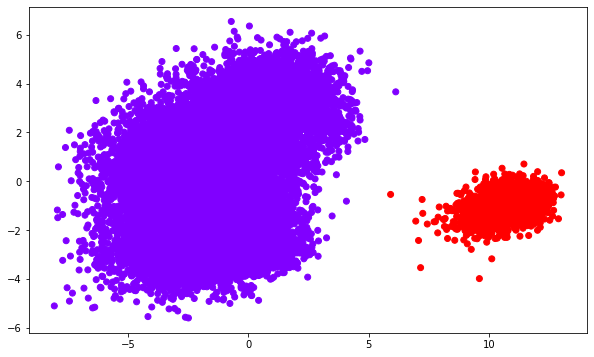

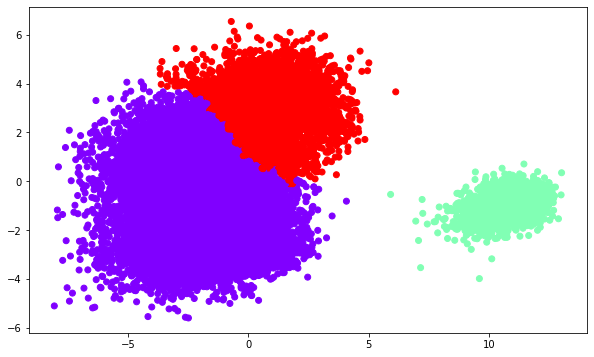

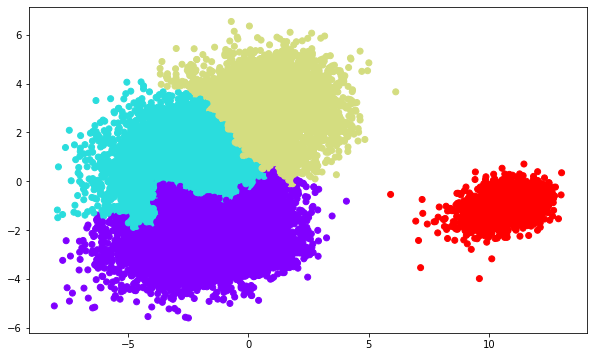

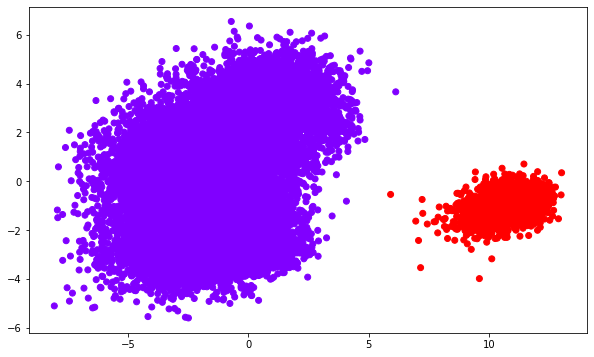

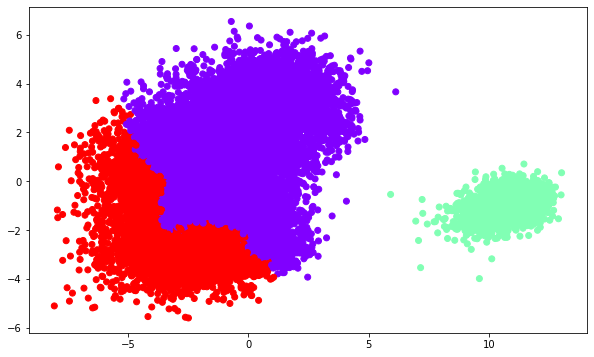

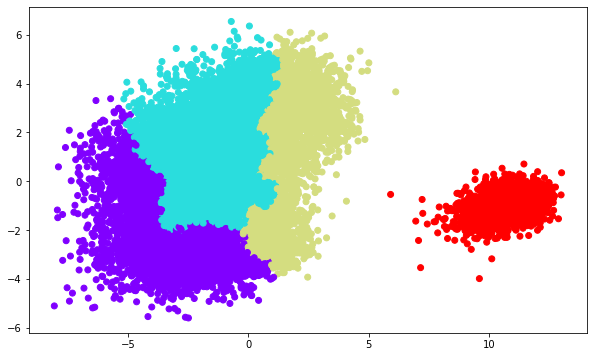

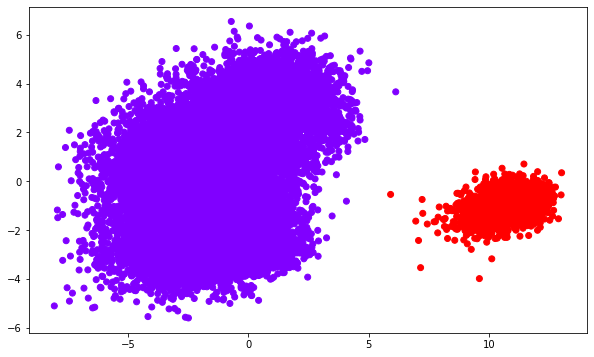

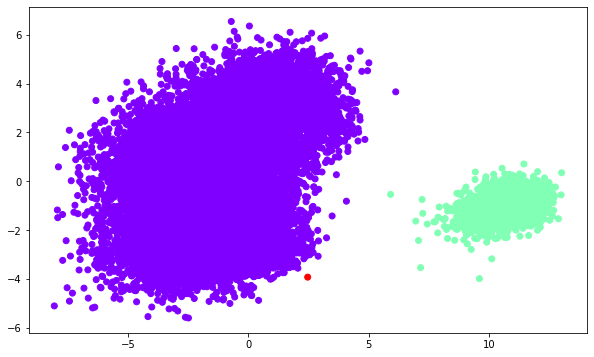

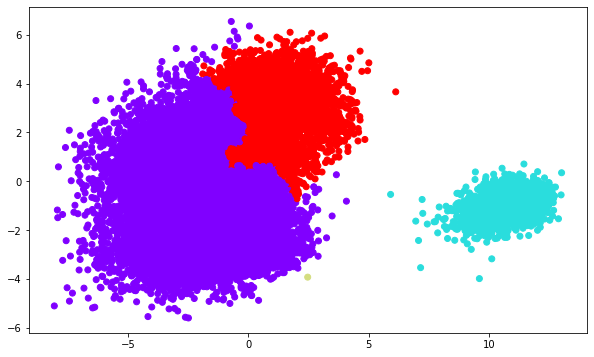

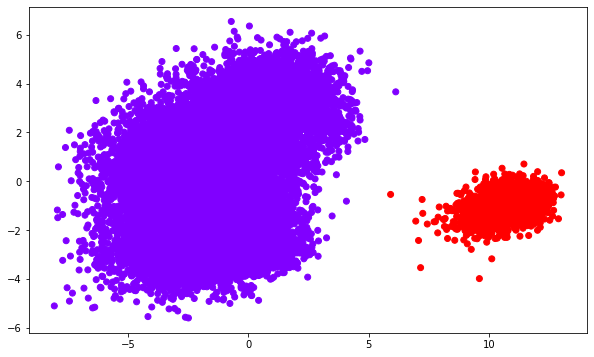

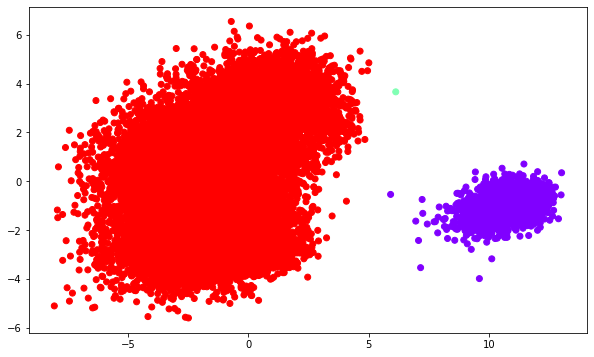

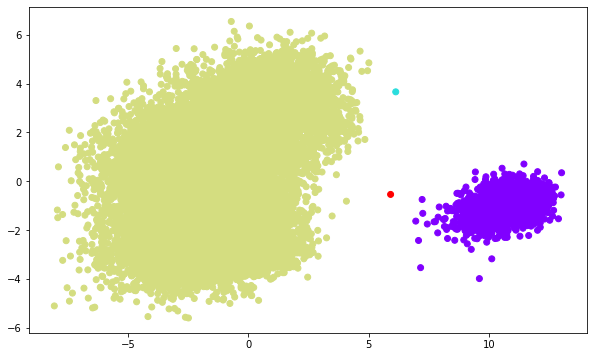

In [ ]:
# draw dendograms for agglomerative clustering
for k in range(2,5):
    # Get Agglomerative Clusters
    from sklearn.cluster import AgglomerativeClustering
    agg = AgglomerativeClustering(n_clusters=k,linkage='ward')
    agg.fit(x_pca)
    labels = agg.labels_
    
    # plot the labels and points
    plt.figure(figsize=(10,6))
    plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='rainbow')  
    plt.show()
    
# ‘complete’, ‘average’, ‘single’
# draw dendograms for agglomerative clustering
for k in range(2,5):
    # Get Agglomerative Clusters
    from sklearn.cluster import AgglomerativeClustering
    agg = AgglomerativeClustering(n_clusters=k,linkage='complete')
    agg.fit(x_pca)
    labels = agg.labels_
    
    # plot the labels and points
    plt.figure(figsize=(10,6))
    plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='rainbow')  
    plt.show()

for k in range(2,5):
    # Get Agglomerative Clusters
    from sklearn.cluster import AgglomerativeClustering
    agg = AgglomerativeClustering(n_clusters=k,linkage='average')
    agg.fit(x_pca)
    labels = agg.labels_
    
    # plot the labels and points
    plt.figure(figsize=(10,6))
    plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='rainbow')  
    plt.show()


for k in range(2,5):
    # Get Agglomerative Clusters
    from sklearn.cluster import AgglomerativeClustering
    agg = AgglomerativeClustering(n_clusters=k,linkage='single')
    agg.fit(x_pca)
    labels = agg.labels_
    
    # plot the labels and points
    plt.figure(figsize=(10,6))
    plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='rainbow')  
    plt.show()
    

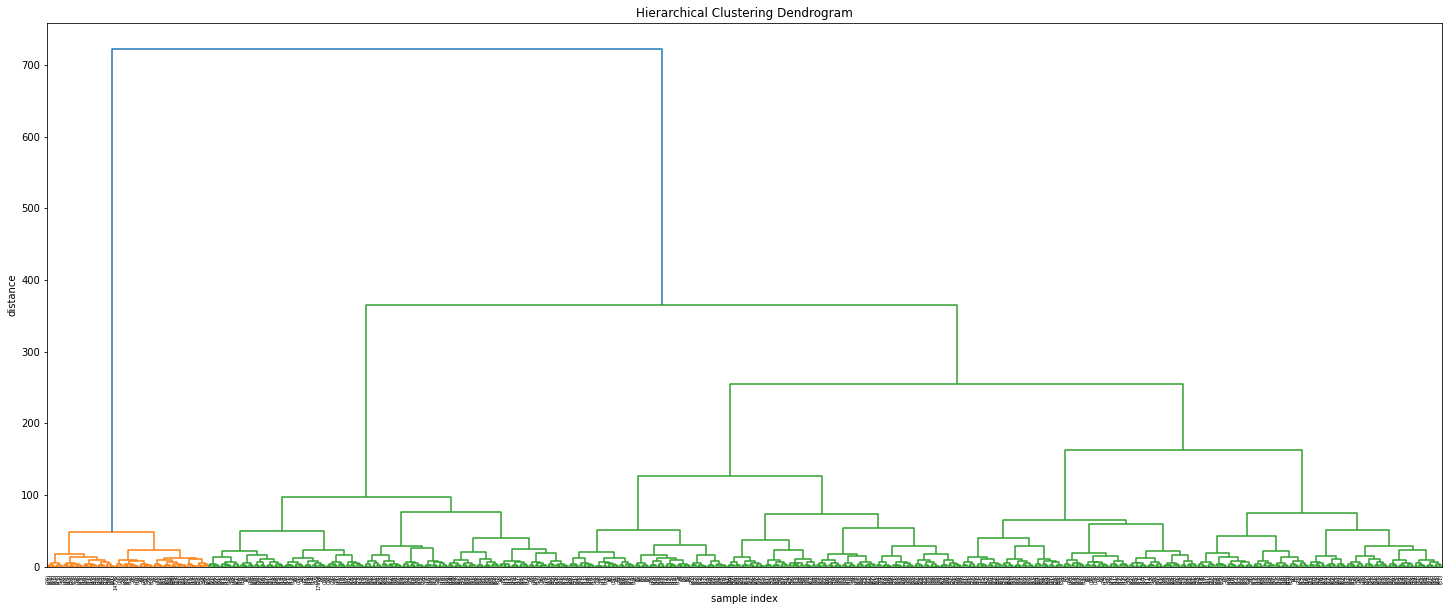

In [ ]:
# apply color to dendogram 
import scipy.cluster.hierarchy as sch
Z = sch.linkage(x_pca, method = 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(Z,truncate_mode='lastp',p = 700)

print()
